In [10]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

def custom_func(ln_x, ln_q):
    x_val = (np.exp(1.5/( ( 0.1 * ((ln_x + 7)**2) ) + 1) )/(np.log(np.exp(ln_q) + 0.007) + 5) + np.exp(-1*(ln_x+12)/5) + 1)*((np.exp(0.5*ln_q))) + 5
    return x_val

data = pd.read_csv("./custom_func_data/6-points.csv")
data_4 = pd.read_csv("./custom_func_data/4-points.csv")
data3 = pd.read_csv("./custom_func_data/linear.csv")
data['6_point_interpolator'] = data['xf']
data['4_point_interpolator'] = data_4['xf']
data['linear_interpolator'] = data3['xf']
data_edge = pd.read_csv("./custom_func_data/slope-edge.csv")
data_avg = pd.read_csv("./custom_func_data/avg_slope_inter.csv")
data_mini_spline = pd.read_csv("./custom_func_data/slope_zero.csv")
data['edge_slope_interpolator'] = data_edge['xf']
data['avg_slope_interpolator'] = data_avg['xf']
data['mini_spline_interpolator'] = data_mini_spline['xf']
  
data.drop('xf', axis = 1)

data['actual_function'] = custom_func(data['lnx'],data['lnq'])

data['6_point_ratio'] = data['6_point_interpolator']/data['actual_function']
data['4_point_ratio'] = data['4_point_interpolator']/data['actual_function']
data['linear_ratio'] = data['linear_interpolator']/data['actual_function']
data['edge_ratio'] = data['edge_slope_interpolator']/data['actual_function']
data['avg_ratio'] = data['avg_slope_interpolator']/data['actual_function']
data['mini_spline_ratio'] = data['mini_spline_interpolator']/data['actual_function']

In [11]:
data_nonend = data[(data.lnq > 0.8) & (data.lnq < 9.3) & (data.lnx >-0.8000000000000305) & (data.lnx < -0.2000000000000305)]

In [12]:
ratio_list = ['6_point_ratio','4_point_ratio','linear_ratio','edge_ratio','avg_ratio','mini_spline_ratio']
labels = ['6 point interpolator', '4 point interpolator', 'linear interpolator', 'edge slope interpolator', 'avg slope interpolator', 'mini spline interpolator']

### individual histograms of all the interpolators. x-axis is the ratio of the interpolated value to actual function value

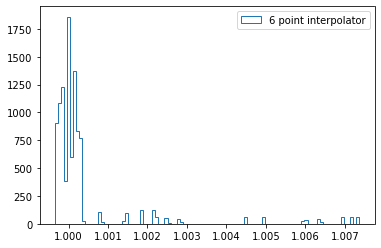

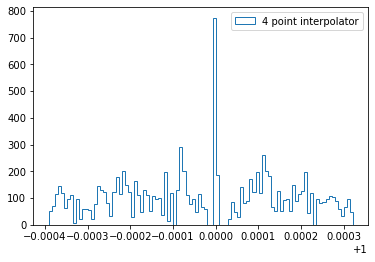

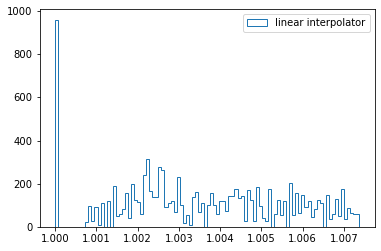

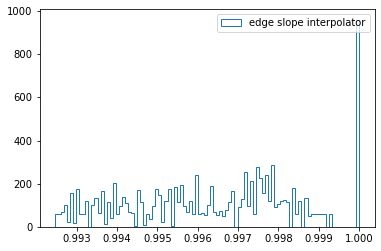

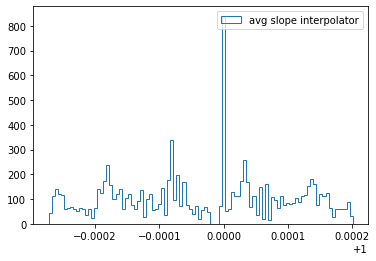

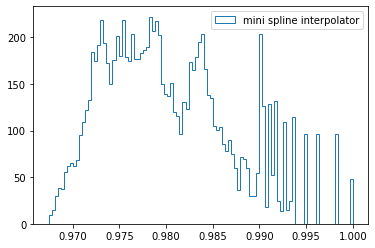

In [13]:
for i in range(0,6):
    plt.hist((data_nonend[ratio_list[i]] ), bins=100, histtype="step", label = labels[i])
    plt.legend()
    plt.show()

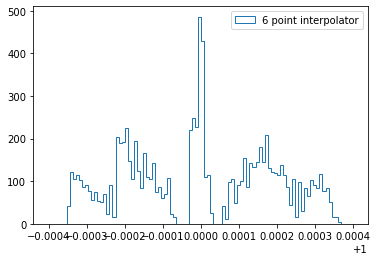

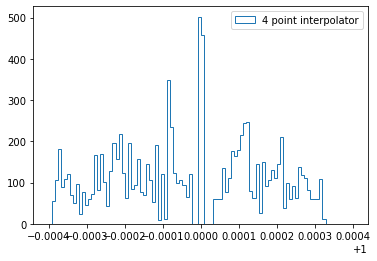

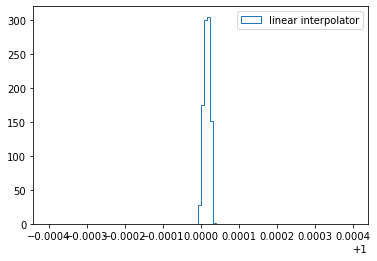

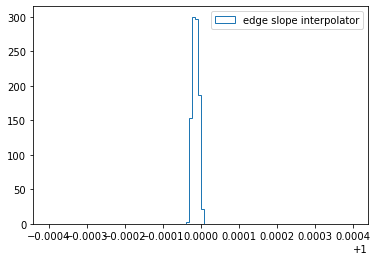

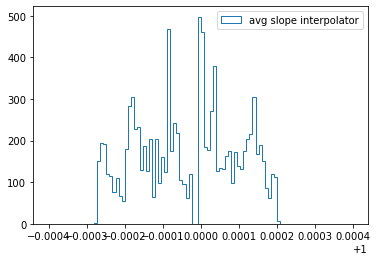

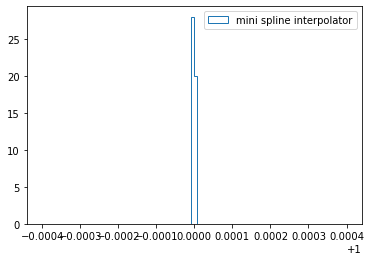

In [14]:
for i in range(0,6):
    plt.hist((data_nonend[ratio_list[i]] ), bins=100, histtype="step", label = labels[i], range = (0.9996,1.0004))
    plt.legend()
    plt.show()

# All we need


### Here we show the max deviation of the ratio of the interpolator/actual function, in both directions (i.e. above and below 1)

In [5]:
print("format : interpolator : max deviation above 1 and max deviation below 1")
for i in range(0,6):
    print("for ",labels[i],"is",  f"{data_nonend[ratio_list[i]].max() -1:.6f}",",", f"{1 -data_nonend[ratio_list[i]].min():.6f}")
#     print("max deviation below 1 for ",labels[i],"is",1 -data_nonend[ratio_list[i]].min())

format : interpolator : max deviation above 1 and max deviation below 1
for  6 point interpolator is 0.007367 , 0.000346
for  4 point interpolator is 0.000322 , 0.000391
for  linear interpolator is 0.007371 , 0.000003
for  edge slope interpolator is 0.000004 , 0.007540
for  avg slope interpolator is 0.000201 , 0.000272
for  mini spline interpolator is 0.000004 , 0.032587


### Standard deviation (as a measure of how much the values fluctuate)

In [6]:
# f"{var:.6f}"
for i in range(0,6):
    print(labels[i],"-",   f"{data_nonend[ratio_list[i]].std():.6f}")

6 point interpolator - 0.001327
4 point interpolator - 0.000194
linear interpolator - 0.002048
edge slope interpolator - 0.002099
avg slope interpolator - 0.000129
mini spline interpolator - 0.006882


### mean of absolute difference of ratio and 1 for all points in dataset

In [7]:
for i in range(0,6):
    print("measure of accuracy for ",labels[i],"is", f"{np.mean(np.abs(data_nonend[ratio_list[i]] - 1)):.6f}")

measure of accuracy for  6 point interpolator is 0.000519
measure of accuracy for  4 point interpolator is 0.000166
measure of accuracy for  linear interpolator is 0.003543
measure of accuracy for  edge slope interpolator is 0.003612
measure of accuracy for  avg slope interpolator is 0.000112
measure of accuracy for  mini spline interpolator is 0.019700


### relative histograms between best 3 dimensional interpolator and the 5 dimensional interpolators

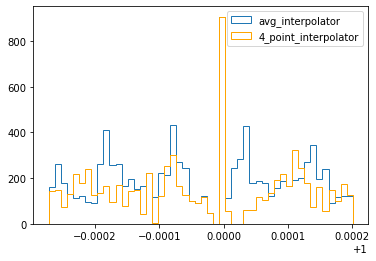

In [8]:
_,bins,_ = plt.hist((data_nonend['avg_ratio'] ), bins=50, histtype="step", label = 'avg_interpolator')
plt.hist((data_nonend['4_point_ratio'] ), bins=bins, histtype="step",color = "orange", label = '4_point_interpolator')
# range = (0.999,1.001),
plt.legend()
plt.show()

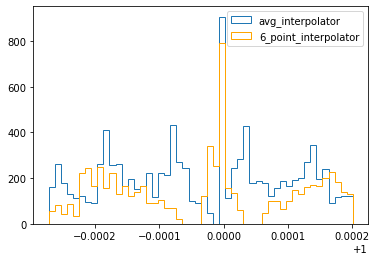

In [9]:
_,bins,_ = plt.hist((data_nonend['avg_ratio'] ), bins=50, histtype="step", label = 'avg_interpolator')
plt.hist((data_nonend['6_point_ratio'] ), bins=bins, histtype="step",color = "orange", label = '6_point_interpolator')
# range = (0.999,1.001),
plt.legend()
plt.show()